## Analysis Notebook

This notebook runs some various analyses on outputs of statistics .csv files
Note that the .csv files are expected to have the following format, and need to include the header as well in the first line:

```
frameNum,status,unitID,unitDefID,unitTeam,unitName
```

In [98]:
%%capture
%pip install pandas
%pip install matplotlib

In [99]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

433 csv files (i.e. replays) analyzed


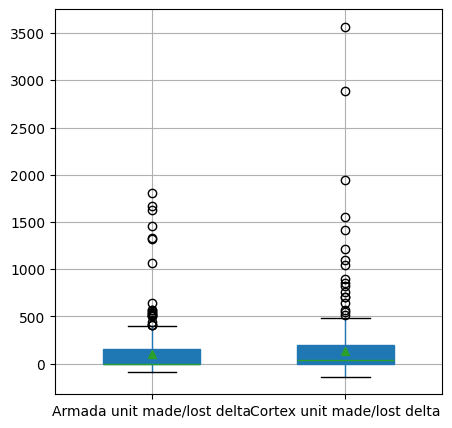

In [100]:
armDeltas = []
corDeltas = []

def analyzeTeam(df):
    f = df[df['status'].eq('finished')]
    d = df[df['status'].eq('destroyed')]
    delta = len(f) - len(d)
    
    isArm = df.iloc[0].unitName.startswith('arm')
    isCor = df.iloc[0].unitName.startswith('cor')
    if isArm:
        armDeltas.append(delta)
    if isCor:
        corDeltas.append(delta)

def analyze(filepath):
    df = pd.read_csv("./analysis_data/" + filepath)
    analyzeTeam(df[df['unitTeam'].eq(0)])
    analyzeTeam(df[df['unitTeam'].eq(1)])

def collect_analyses():
    deltas = pd.DataFrame({'Armada unit made/lost delta': pd.Series(armDeltas, name="ham"), 'Cortex unit made/lost delta': pd.Series(corDeltas)})
    p = deltas.boxplot(figsize=(5,5), widths=0.5, patch_artist=True, showmeans=True, showfliers=True)
    


analysis_datafiles = os.listdir("./analysis_data")
print(len(analysis_datafiles), "csv files (i.e. replays) analyzed")
for f in analysis_datafiles:
    analyze(f)
collect_analyses()

433 csv files (i.e. replays) analyzed


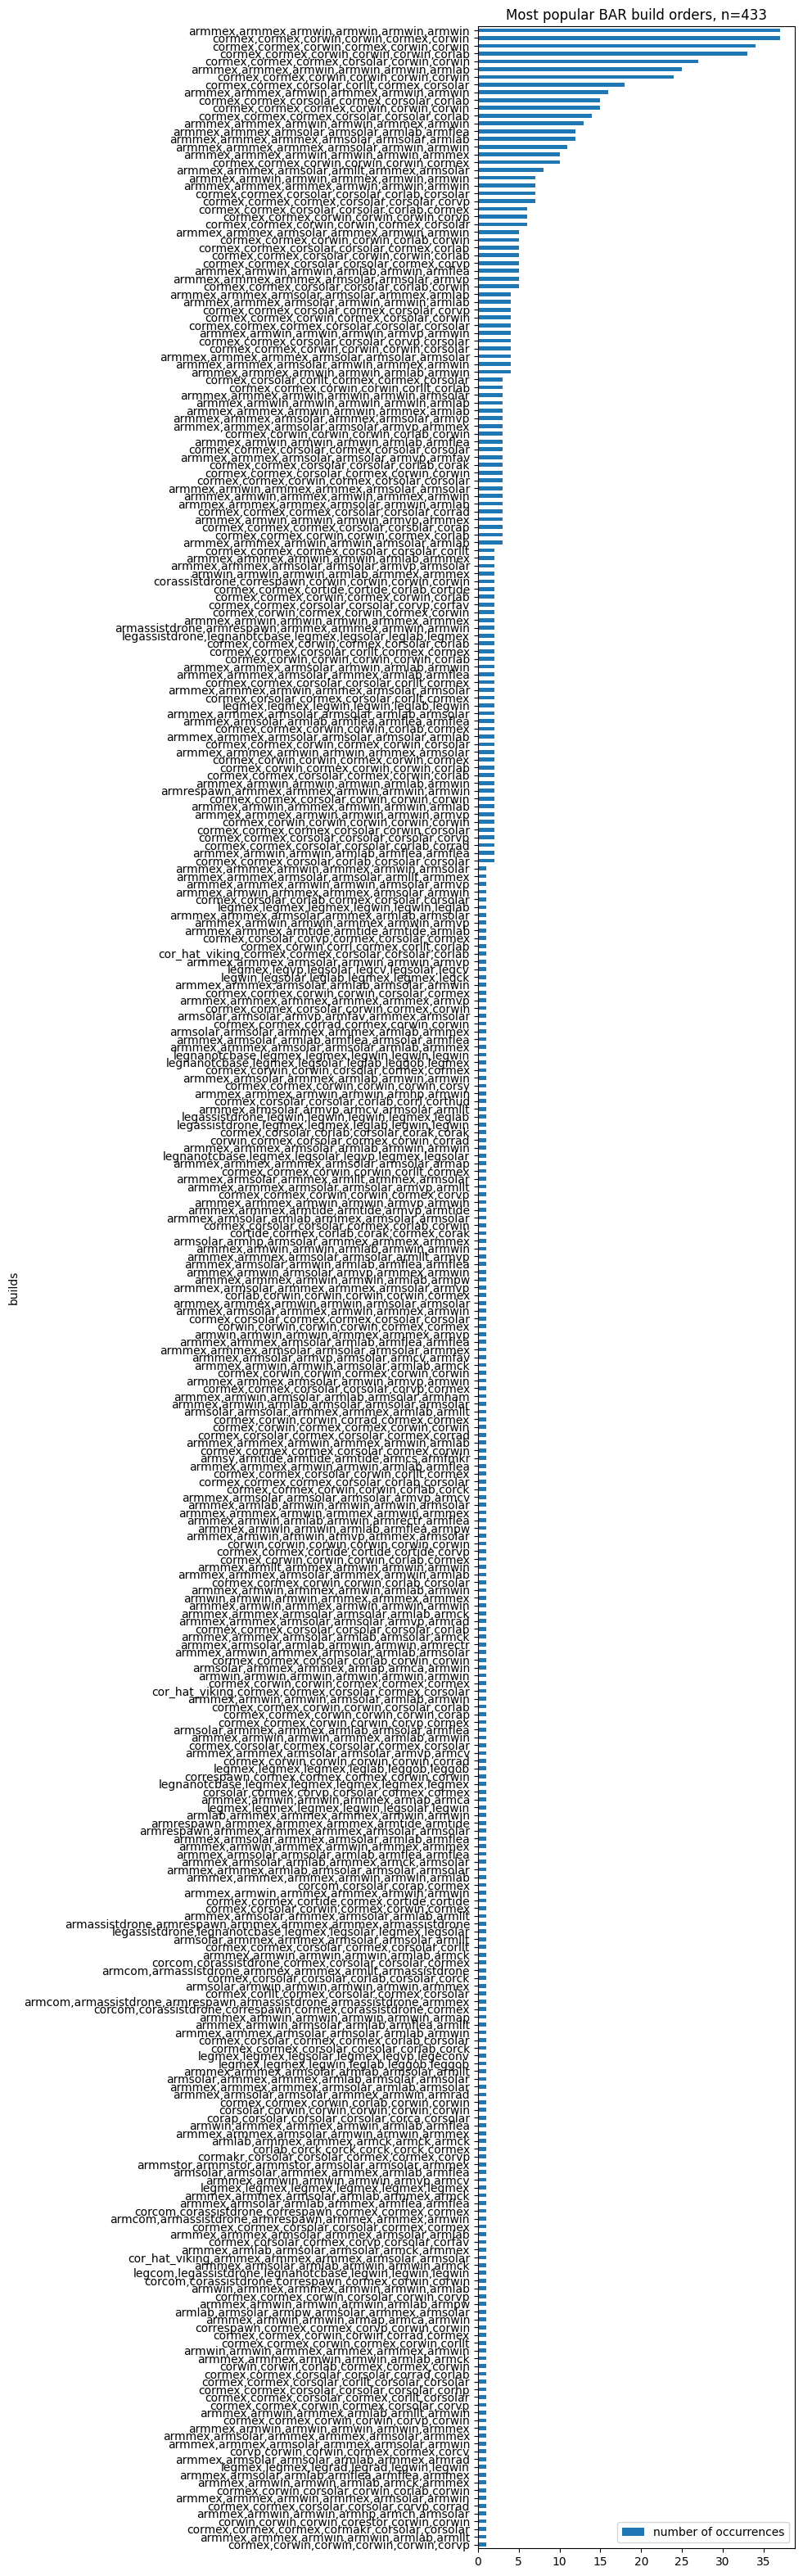

In [101]:
builds = {}

def analyzeTeam(df):
    f = ",".join(df[df['status'].eq('finished')].head(7).tail(6)['unitName'])
    if f in builds:
        builds[f] += 1
    else:
        builds[f] = 1


def analyze(filepath):
    df = pd.read_csv("./analysis_data/" + filepath)
    analyzeTeam(df[df['unitTeam'].eq(0)])
    analyzeTeam(df[df['unitTeam'].eq(1)])

def collect_analyses():
    # print(builds)
    ordered_build_keys = sorted(builds.keys(), key=lambda k: builds[k])
    ordered_build_values = [builds[k] for k in ordered_build_keys]
    deltas = pd.DataFrame({'builds': ordered_build_keys, 'number of occurrences': ordered_build_values})
    p = deltas.plot.barh(title="Most popular BAR build orders, n=%s" % len(analysis_datafiles), x='builds', y='number of occurrences', figsize=(5,40))
    


analysis_datafiles = os.listdir("./analysis_data")
print(len(analysis_datafiles), "csv files (i.e. replays) analyzed")
for f in analysis_datafiles:
    analyze(f)
collect_analyses()

433 csv files (i.e. replays) analyzed


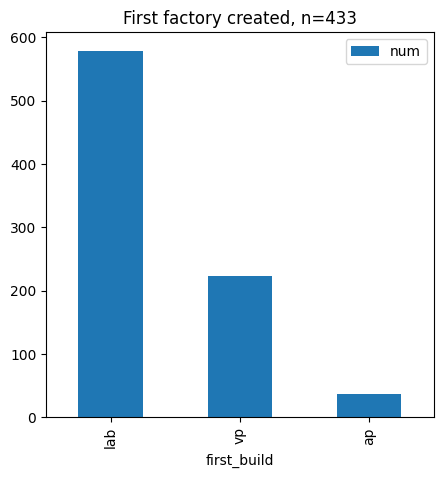

In [102]:
first_builds = {
    "lab": 0,
    "vp": 0,
    "ap": 0
}

def getFrameNum(df):
    if df.size > 0:
        return int(df.head(1).get('frameNum').iloc[0])
    else:
        return None

def analyzeTeam(df):
    df = df[df['status'].eq('finished')]
    frnr_lab = getFrameNum(df[df['unitName'].eq('armlab')]) or getFrameNum(df[df['unitName'].eq('corlab')])
    frnr_vp = getFrameNum(df[df['unitName'].eq('armvp')]) or getFrameNum(df[df['unitName'].eq('corvp')])
    frnr_ap = getFrameNum(df[df['unitName'].eq('armap')]) or getFrameNum(df[df['unitName'].eq('corap')])
    lab = frnr_lab or sys.maxsize
    vp = frnr_vp or sys.maxsize
    ap = frnr_ap or sys.maxsize
    
    if lab < vp and lab < ap:
        first_builds["lab"] += 1
    if vp < lab and vp < ap:
        first_builds["vp"] += 1
    if ap < lab and ap < vp:
        first_builds["ap"] += 1
    #print(frnr_lab, frnr_vp, frnr_ap)


def analyze(filepath):
    df = pd.read_csv("./analysis_data/" + filepath)
    analyzeTeam(df[df['unitTeam'].eq(0)])
    analyzeTeam(df[df['unitTeam'].eq(1)])

def collect_analyses():
    # print(builds)
    keys = sorted(first_builds.keys(), key=lambda k: -first_builds[k])
    values = [first_builds[k] for k in keys]
    deltas = pd.DataFrame({'first_build': keys, 'num': values})
    p = deltas.plot.bar(title="First factory created, n=%s" % len(analysis_datafiles), x='first_build', y='num', figsize=(5,5))
    


analysis_datafiles = os.listdir("./analysis_data")
print(len(analysis_datafiles), "csv files (i.e. replays) analyzed")
for f in analysis_datafiles:
    analyze(f)
collect_analyses()